# 🚗 Traffic Accidents Analysis & Model Training

This notebook provides a comprehensive analysis of traffic accident data and trains multiple machine learning models to predict crash severity.

## Project Overview
- **Dataset**: Traffic accidents data
- **Goal**: Predict crash severity based on environmental and situational factors
- **Models**: Decision Tree, Random Forest, Logistic Regression, SVM
- **Visualizations**: Matplotlib for all charts and graphs

---

## 1. Import Required Libraries

Let's import all the necessary libraries for data analysis, visualization, and machine learning.

In [15]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Machine Learning - Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    roc_auc_score
)

# Model persistence
import pickle

# Set matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📊 Pandas version: 2.3.0
🔢 NumPy version: 2.3.1


## 2. Load and Explore the Dataset

Load the traffic accidents dataset and perform initial exploration to understand the data structure and characteristics.

In [16]:
# Load the dataset
df = pd.read_csv('traffic_accidents.csv')

# Display basic information
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📝 Number of Records: {df.shape[0]:,}")
print(f"📋 Number of Features: {df.shape[1]}")

print("\n" + "="*70)
print("COLUMN INFORMATION")
print("="*70)
print(df.info())

print("\n" + "="*70)
print("FIRST 5 RECORDS")
print("="*70)
display(df.head())

print("\n" + "="*70)
print("MISSING VALUES")
print("="*70)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")

print("\n" + "="*70)
print("TARGET VARIABLE: most_severe_injury")
print("="*70)
print(df['most_severe_injury'].value_counts())
print(f"\nTotal unique classes: {df['most_severe_injury'].nunique()}")

DATASET OVERVIEW

📊 Dataset Shape: (209306, 24)
📝 Number of Records: 209,306
📋 Number of Features: 24

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i        

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8



MISSING VALUES
No missing values!

TARGET VARIABLE: most_severe_injury
most_severe_injury
NO INDICATION OF INJURY     154789
NONINCAPACITATING INJURY     31527
REPORTED, NOT EVIDENT        16075
INCAPACITATING INJURY         6564
FATAL                          351
Name: count, dtype: int64

Total unique classes: 5
No missing values!

TARGET VARIABLE: most_severe_injury
most_severe_injury
NO INDICATION OF INJURY     154789
NONINCAPACITATING INJURY     31527
REPORTED, NOT EVIDENT        16075
INCAPACITATING INJURY         6564
FATAL                          351
Name: count, dtype: int64

Total unique classes: 5


## 3. Data Visualization - Exploratory Analysis

Let's visualize the dataset to understand patterns and distributions using matplotlib.

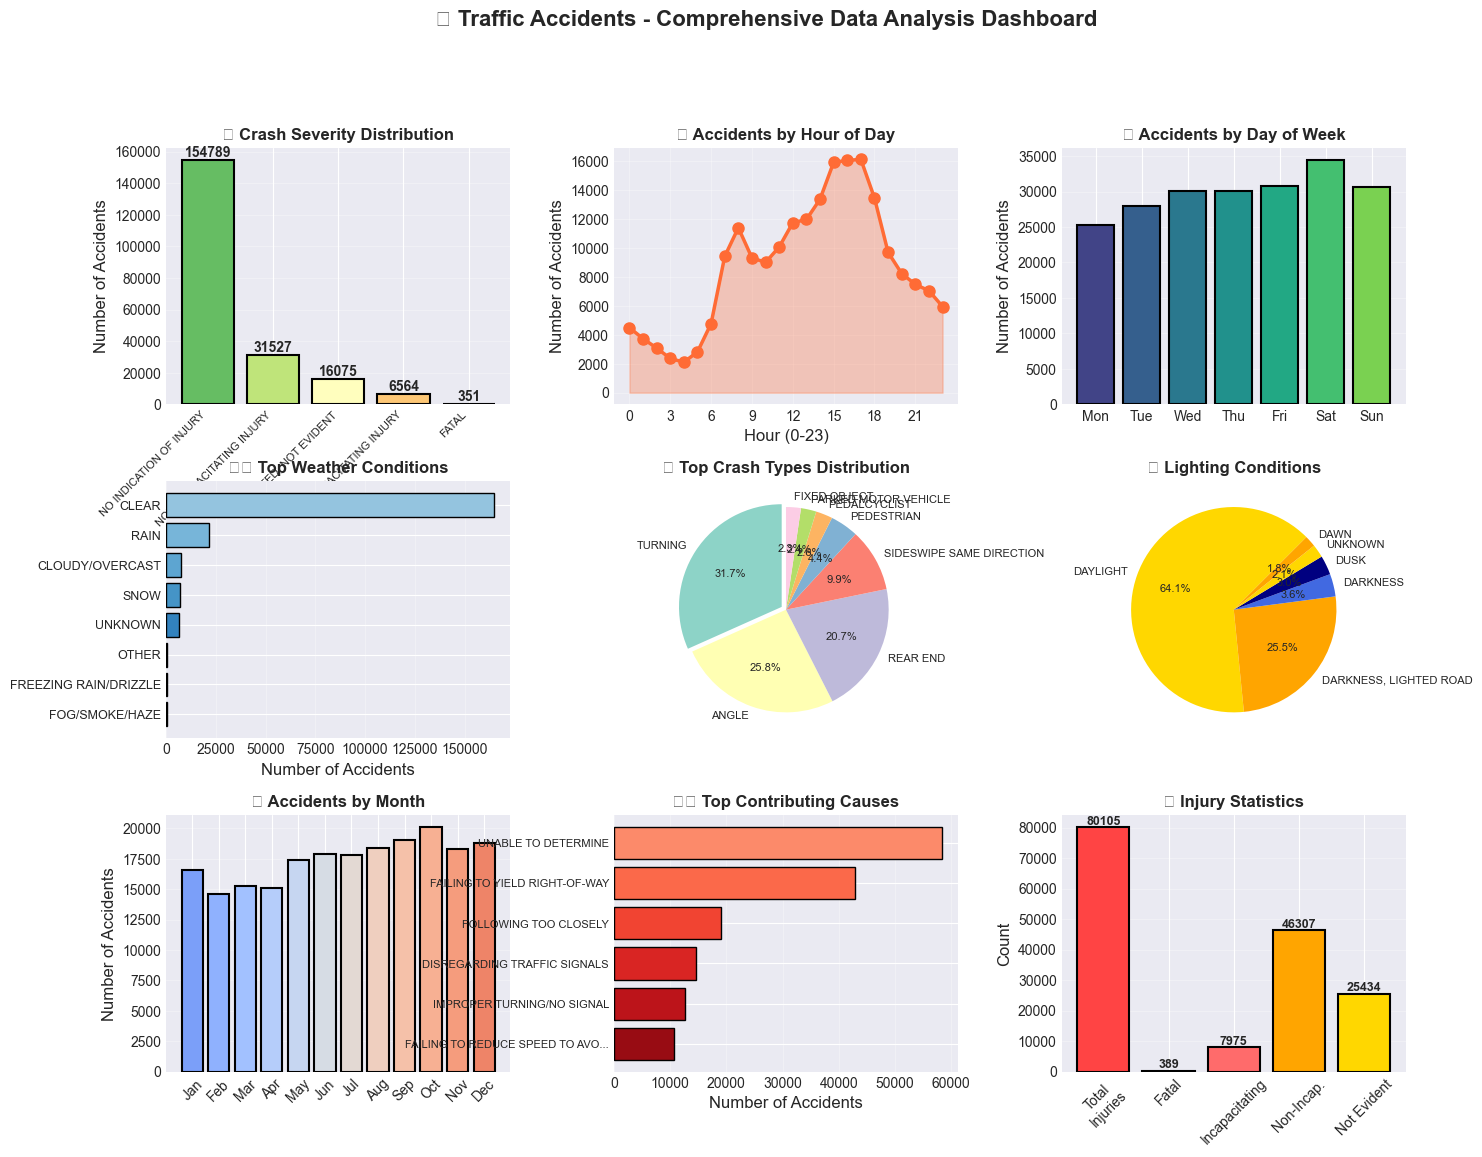

✅ Comprehensive visualization dashboard created!


In [17]:
# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Crash Severity Distribution
ax1 = fig.add_subplot(gs[0, 0])
severity_counts = df['most_severe_injury'].value_counts()
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(severity_counts)))
bars = ax1.bar(range(len(severity_counts)), severity_counts.values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xticks(range(len(severity_counts)))
ax1.set_xticklabels(severity_counts.index, rotation=45, ha='right', fontsize=8)
ax1.set_title('🚨 Crash Severity Distribution', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Accidents')
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(severity_counts.values):
    ax1.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Accidents by Hour of Day
ax2 = fig.add_subplot(gs[0, 1])
hourly = df['crash_hour'].value_counts().sort_index()
ax2.plot(hourly.index, hourly.values, marker='o', linewidth=2.5, markersize=8, color='#FF6B35')
ax2.fill_between(hourly.index, hourly.values, alpha=0.3, color='#FF6B35')
ax2.set_title('⏰ Accidents by Hour of Day', fontweight='bold', fontsize=12)
ax2.set_xlabel('Hour (0-23)')
ax2.set_ylabel('Number of Accidents')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(0, 24, 3))

# 3. Accidents by Day of Week
ax3 = fig.add_subplot(gs[0, 2])
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily = df['crash_day_of_week'].value_counts().sort_index()
colors_days = plt.cm.viridis(np.linspace(0.2, 0.8, len(daily)))
ax3.bar([days[i-1] for i in daily.index], daily.values, color=colors_days, edgecolor='black', linewidth=1.5)
ax3.set_title('📅 Accidents by Day of Week', fontweight='bold', fontsize=12)
ax3.set_ylabel('Number of Accidents')
ax3.grid(axis='y', alpha=0.3)

# 4. Weather Conditions
ax4 = fig.add_subplot(gs[1, 0])
weather = df['weather_condition'].value_counts().head(8)
ax4.barh(range(len(weather)), weather.values, color=plt.cm.Blues(np.linspace(0.4, 0.9, len(weather))), edgecolor='black')
ax4.set_yticks(range(len(weather)))
ax4.set_yticklabels(weather.index, fontsize=9)
ax4.set_title('🌦️ Top Weather Conditions', fontweight='bold', fontsize=12)
ax4.set_xlabel('Number of Accidents')
ax4.grid(axis='x', alpha=0.3)
ax4.invert_yaxis()

# 5. Crash Types
ax5 = fig.add_subplot(gs[1, 1])
crash_types = df['first_crash_type'].value_counts().head(8)
explode = [0.05 if i == 0 else 0 for i in range(len(crash_types))]
colors_pie = plt.cm.Set3(range(len(crash_types)))
wedges, texts, autotexts = ax5.pie(crash_types.values, labels=crash_types.index, autopct='%1.1f%%',
                                     explode=explode, colors=colors_pie, startangle=90,
                                     textprops={'fontsize': 8})
ax5.set_title('💥 Top Crash Types Distribution', fontweight='bold', fontsize=12)

# 6. Lighting Conditions
ax6 = fig.add_subplot(gs[1, 2])
lighting = df['lighting_condition'].value_counts()
colors_light = ['#FFD700', '#FFA500', '#4169E1', '#000080']
wedges, texts, autotexts = ax6.pie(lighting.values, labels=lighting.index, autopct='%1.1f%%',
                                     colors=colors_light[:len(lighting)], startangle=45,
                                     textprops={'fontsize': 8})
ax6.set_title('💡 Lighting Conditions', fontweight='bold', fontsize=12)

# 7. Monthly Distribution
ax7 = fig.add_subplot(gs[2, 0])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly = df['crash_month'].value_counts().sort_index()
colors_month = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(monthly)))
ax7.bar([months[i-1] for i in monthly.index], monthly.values, color=colors_month, edgecolor='black', linewidth=1.5)
ax7.set_title('📆 Accidents by Month', fontweight='bold', fontsize=12)
ax7.set_ylabel('Number of Accidents')
ax7.tick_params(axis='x', rotation=45)
ax7.grid(axis='y', alpha=0.3)

# 8. Contributing Causes
ax8 = fig.add_subplot(gs[2, 1])
causes = df['prim_contributory_cause'].value_counts().head(6)
ax8.barh(range(len(causes)), causes.values, color=plt.cm.Reds(np.linspace(0.4, 0.9, len(causes))), edgecolor='black')
ax8.set_yticks(range(len(causes)))
ax8.set_yticklabels([c[:30] + '...' if len(c) > 30 else c for c in causes.index], fontsize=8)
ax8.set_title('⚠️ Top Contributing Causes', fontweight='bold', fontsize=12)
ax8.set_xlabel('Number of Accidents')
ax8.grid(axis='x', alpha=0.3)
ax8.invert_yaxis()

# 9. Injury Statistics
ax9 = fig.add_subplot(gs[2, 2])
injury_stats = {
    'Total\nInjuries': df['injuries_total'].sum(),
    'Fatal': df['injuries_fatal'].sum(),
    'Incapacitating': df['injuries_incapacitating'].sum(),
    'Non-Incap.': df['injuries_non_incapacitating'].sum(),
    'Not Evident': df['injuries_reported_not_evident'].sum()
}
colors_inj = ['#FF4444', '#CC0000', '#FF6B6B', '#FFA500', '#FFD700']
bars = ax9.bar(injury_stats.keys(), injury_stats.values(), color=colors_inj, edgecolor='black', linewidth=1.5)
ax9.set_title('🏥 Injury Statistics', fontweight='bold', fontsize=12)
ax9.set_ylabel('Count')
ax9.tick_params(axis='x', rotation=45)
ax9.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('🚗 Traffic Accidents - Comprehensive Data Analysis Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('comprehensive_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Comprehensive visualization dashboard created!")

## 4. Data Preprocessing

Prepare the data for machine learning by handling missing values, encoding categorical variables, and selecting features.

In [18]:
# Create a copy for preprocessing
df_processed = df.copy()

# Convert crash_date to datetime
df_processed['crash_date'] = pd.to_datetime(df_processed['crash_date'])

# Select important features for modeling
feature_columns = [
    'traffic_control_device',
    'weather_condition',
    'lighting_condition',
    'first_crash_type',
    'roadway_surface_cond',
    'crash_type',
    'damage',
    'prim_contributory_cause',
    'num_units',
    'crash_hour',
    'crash_day_of_week',
    'crash_month'
]

# Target variable
target = 'most_severe_injury'

# Create modeling dataset
df_model = df_processed[feature_columns + [target]].copy()

# Handle missing values
print("="*70)
print("HANDLING MISSING VALUES")
print("="*70)
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        missing_count = df_model[col].isnull().sum()
        if missing_count > 0:
            print(f"Filling {missing_count} missing values in '{col}' with 'UNKNOWN'")
        df_model[col] = df_model[col].fillna('UNKNOWN')
    else:
        missing_count = df_model[col].isnull().sum()
        if missing_count > 0:
            median_val = df_model[col].median()
            print(f"Filling {missing_count} missing values in '{col}' with median: {median_val}")
        df_model[col] = df_model[col].fillna(df_model[col].median())

print("\n✅ Missing values handled!")

# Encode categorical features
print("\n" + "="*70)
print("ENCODING CATEGORICAL FEATURES")
print("="*70)

label_encoders = {}

for col in feature_columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col].astype(str))
        label_encoders[col] = le
        print(f"✓ Encoded '{col}': {len(le.classes_)} unique values")

# Encode target variable
le_target = LabelEncoder()
df_model[target] = le_target.fit_transform(df_model[target].astype(str))
label_encoders[target] = le_target

print(f"\n📊 Target variable classes: {list(le_target.classes_)}")
print(f"📊 Encoded as: {list(range(len(le_target.classes_)))}")

print("\n" + "="*70)
print("PREPROCESSED DATASET INFO")
print("="*70)
print(f"Shape: {df_model.shape}")
print(f"Features: {len(feature_columns)}")
print(f"Target classes: {len(le_target.classes_)}")
print("\nFirst 5 rows of preprocessed data:")
display(df_model.head())

HANDLING MISSING VALUES

✅ Missing values handled!

ENCODING CATEGORICAL FEATURES
✓ Encoded 'traffic_control_device': 19 unique values
✓ Encoded 'weather_condition': 12 unique values
✓ Encoded 'lighting_condition': 6 unique values
✓ Encoded 'first_crash_type': 18 unique values

✅ Missing values handled!

ENCODING CATEGORICAL FEATURES
✓ Encoded 'traffic_control_device': 19 unique values
✓ Encoded 'weather_condition': 12 unique values
✓ Encoded 'lighting_condition': 6 unique values
✓ Encoded 'first_crash_type': 18 unique values
✓ Encoded 'roadway_surface_cond': 7 unique values
✓ Encoded 'crash_type': 2 unique values
✓ Encoded 'damage': 3 unique values
✓ Encoded 'prim_contributory_cause': 40 unique values

📊 Target variable classes: ['FATAL', 'INCAPACITATING INJURY', 'NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY', 'REPORTED, NOT EVIDENT']
📊 Encoded as: [0, 1, 2, 3, 4]

PREPROCESSED DATASET INFO
Shape: (209306, 13)
Features: 12
Target classes: 5

First 5 rows of preprocessed data:
✓

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,roadway_surface_cond,crash_type,damage,prim_contributory_cause,num_units,crash_hour,crash_day_of_week,crash_month,most_severe_injury
0,16,2,3,17,5,1,1,36,2,13,7,7,2
1,16,2,1,17,0,1,2,24,2,0,1,8,2
2,16,2,3,10,0,1,1,19,3,10,5,12,2
3,16,2,3,0,0,0,2,36,2,19,4,8,3
4,16,2,3,10,5,1,1,12,2,14,7,8,2


## 5. Split Data into Training and Testing Sets

Split the dataset into training (80%) and testing (20%) sets for model evaluation.

In [19]:
# Separate features and target
X = df_model[feature_columns]
y = df_model[target]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures balanced classes in both sets
)

print("="*70)
print("DATA SPLIT SUMMARY")
print("="*70)
print(f"\n📊 Total samples: {len(X):,}")
print(f"🎓 Training samples: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"🧪 Testing samples: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\n📋 Number of features: {X.shape[1]}")
print(f"🎯 Number of classes: {len(np.unique(y))}")

print("\n" + "="*70)
print("CLASS DISTRIBUTION IN TRAINING SET")
print("="*70)
train_dist = pd.Series(y_train).value_counts().sort_index()
for idx, count in train_dist.items():
    class_name = le_target.inverse_transform([idx])[0]
    print(f"{class_name}: {count} ({count/len(y_train)*100:.1f}%)")

print("\n" + "="*70)
print("CLASS DISTRIBUTION IN TESTING SET")
print("="*70)
test_dist = pd.Series(y_test).value_counts().sort_index()
for idx, count in test_dist.items():
    class_name = le_target.inverse_transform([idx])[0]
    print(f"{class_name}: {count} ({count/len(y_test)*100:.1f}%)")

print("\n✅ Data split completed successfully!")

DATA SPLIT SUMMARY

📊 Total samples: 209,306
🎓 Training samples: 167,444 (80.0%)
🧪 Testing samples: 41,862 (20.0%)

📋 Number of features: 12
🎯 Number of classes: 5

CLASS DISTRIBUTION IN TRAINING SET
FATAL: 281 (0.2%)
INCAPACITATING INJURY: 5251 (3.1%)
NO INDICATION OF INJURY: 123831 (74.0%)
NONINCAPACITATING INJURY: 25221 (15.1%)
REPORTED, NOT EVIDENT: 12860 (7.7%)

CLASS DISTRIBUTION IN TESTING SET
FATAL: 70 (0.2%)
INCAPACITATING INJURY: 1313 (3.1%)
NO INDICATION OF INJURY: 30958 (74.0%)
NONINCAPACITATING INJURY: 6306 (15.1%)
REPORTED, NOT EVIDENT: 3215 (7.7%)

✅ Data split completed successfully!


## 6. Train Machine Learning Models

Train two simple models to compare their performance:
1. **Decision Tree**: Simple, interpretable tree-based model
2. **Logistic Regression**: Linear model for multi-class classification

In [20]:
# Initialize models dictionary
models = {}
predictions = {}
training_time = {}

print("="*70)
print("TRAINING MACHINE LEARNING MODELS")
print("="*70)

# 1. Decision Tree
print("\n🌳 Training Decision Tree Classifier...")
import time
start = time.time()
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_model.fit(X_train, y_train)
models['Decision Tree'] = dt_model
predictions['Decision Tree'] = dt_model.predict(X_test)
training_time['Decision Tree'] = time.time() - start
print(f"   ✓ Training completed in {training_time['Decision Tree']:.3f} seconds")

# 2. Logistic Regression
print("\n📊 Training Logistic Regression...")
start = time.time()
lr_model = LogisticRegression(
    max_iter=500,
    random_state=42,
    solver='lbfgs'
)
lr_model.fit(X_train, y_train)
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_model.predict(X_test)
training_time['Logistic Regression'] = time.time() - start
print(f"   ✓ Training completed in {training_time['Logistic Regression']:.3f} seconds")

print("\n" + "="*70)
print("✅ ALL MODELS TRAINED SUCCESSFULLY!")
print("="*70)
print(f"\n📊 Total models trained: {len(models)}")
print(f"⏱️  Total training time: {sum(training_time.values()):.3f} seconds")

TRAINING MACHINE LEARNING MODELS

🌳 Training Decision Tree Classifier...
   ✓ Training completed in 0.390 seconds

📊 Training Logistic Regression...
   ✓ Training completed in 0.390 seconds

📊 Training Logistic Regression...
   ✓ Training completed in 23.304 seconds

✅ ALL MODELS TRAINED SUCCESSFULLY!

📊 Total models trained: 2
⏱️  Total training time: 23.694 seconds
   ✓ Training completed in 23.304 seconds

✅ ALL MODELS TRAINED SUCCESSFULLY!

📊 Total models trained: 2
⏱️  Total training time: 23.694 seconds


## 7. Evaluate Model Performance

Calculate and compare accuracy, precision, recall, and F1-score for all trained models.

In [21]:
# Calculate metrics for each model
metrics_data = []

print("="*70)
print("MODEL PERFORMANCE EVALUATION")
print("="*70)

for model_name in models.keys():
    y_pred = predictions[model_name]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    metrics_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (s)': training_time[model_name]
    })
    
    print(f"\n🤖 {model_name}")
    print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   Training Time: {training_time[model_name]:.3f}s")

# Create DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*70)
print("PERFORMANCE COMPARISON (Sorted by Accuracy)")
print("="*70)
display(metrics_df.style.background_gradient(cmap='RdYlGn', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
                       .format({'Accuracy': '{:.4f}', 'Precision': '{:.4f}', 
                               'Recall': '{:.4f}', 'F1-Score': '{:.4f}',
                               'Training Time (s)': '{:.3f}'}))

# Find best model
best_model_name = metrics_df.iloc[0]['Model']
best_accuracy = metrics_df.iloc[0]['Accuracy']
print(f"\n🏆 Best Model: {best_model_name} with {best_accuracy*100:.2f}% accuracy")

MODEL PERFORMANCE EVALUATION

🤖 Decision Tree
   Accuracy:  0.7825 (78.25%)
   Precision: 0.7276
   Recall:    0.7825
   F1-Score:  0.7247
   Training Time: 0.390s

🤖 Logistic Regression
   Accuracy:  0.7630 (76.30%)
   Precision: 0.6556
   Recall:    0.7630
   F1-Score:  0.6983
   Training Time: 23.304s

PERFORMANCE COMPARISON (Sorted by Accuracy)


,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s)
0,Decision Tree,0.7825,0.7276,0.7825,0.7247,0.390
1,Logistic Regression,0.7630,0.6556,0.7630,0.6983,23.304



🏆 Best Model: Decision Tree with 78.25% accuracy


## 8. Visualize Model Comparison

Create simple visualizations to compare the two models.

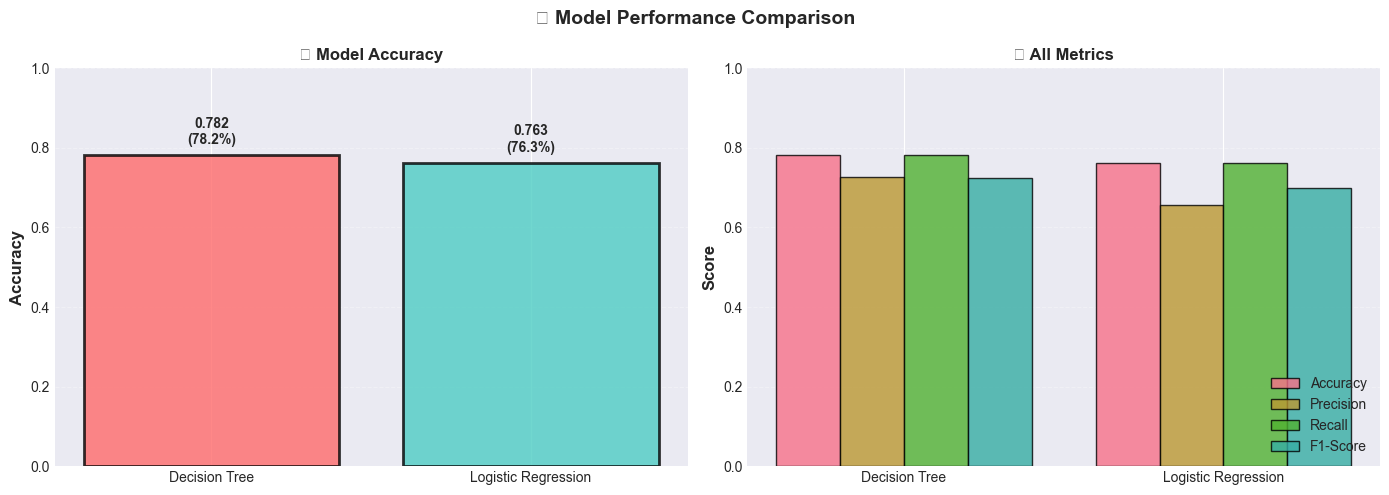

✅ Model comparison visualization created!


In [22]:
# Create simple model comparison visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('🤖 Model Performance Comparison', fontsize=14, fontweight='bold')

colors = ['#FF6B6B', '#4ECDC4']
model_names = list(models.keys())

# 1. Accuracy Comparison
ax1 = axes[0]
accuracies = [metrics_df[metrics_df['Model'] == name]['Accuracy'].values[0] for name in model_names]
bars1 = ax1.bar(model_names, accuracies, color=colors, edgecolor='black', linewidth=2, alpha=0.8)
ax1.set_title('📊 Model Accuracy', fontweight='bold', fontsize=12)
ax1.set_ylabel('Accuracy', fontweight='bold')
ax1.set_ylim([0, 1.0])
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for i, (bar, acc) in enumerate(zip(bars1, accuracies)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{acc:.3f}\n({acc*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. All Metrics Comparison
ax2 = axes[1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(model_names))
width = 0.2
for i, metric in enumerate(metrics):
    values = [metrics_df[metrics_df['Model'] == name][metric].values[0] for name in model_names]
    offset = (i - 1.5) * width
    ax2.bar(x + offset, values, width, label=metric, alpha=0.8, edgecolor='black', linewidth=1)

ax2.set_title('📈 All Metrics', fontweight='bold', fontsize=12)
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names)
ax2.set_ylim([0, 1.0])
ax2.legend(loc='lower right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Model comparison visualization created!")

## 9. Confusion Matrices Visualization

Visualize confusion matrices for all models to understand prediction patterns and misclassifications.

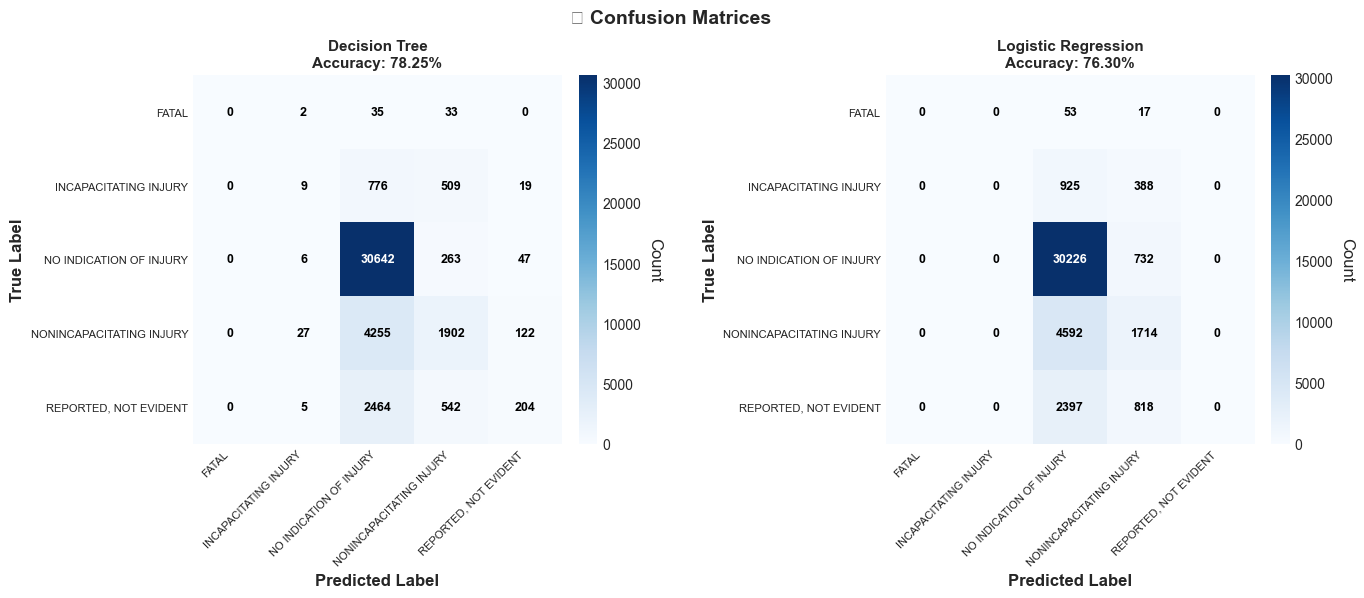

✅ Confusion matrices visualization created!

DETAILED CLASSIFICATION REPORTS

📋 Decision Tree
                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00        70
   INCAPACITATING INJURY       0.18      0.01      0.01      1313
 NO INDICATION OF INJURY       0.80      0.99      0.89     30958
NONINCAPACITATING INJURY       0.59      0.30      0.40      6306
   REPORTED, NOT EVIDENT       0.52      0.06      0.11      3215

                accuracy                           0.78     41862
               macro avg       0.42      0.27      0.28     41862
            weighted avg       0.73      0.78      0.72     41862


📋 Logistic Regression
                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00        70
   INCAPACITATING INJURY       0.00      0.00      0.00      1313
 NO INDICATION OF INJURY       0.79      0.98      0.87     30958
NONINCAPACITATING INJ

In [23]:
# Create confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('📊 Confusion Matrices', fontsize=14, fontweight='bold')

class_names = le_target.classes_

for idx, (model_name, model) in enumerate(models.items()):
    y_pred = predictions[model_name]
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    ax = axes[idx]
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'{model_name}\nAccuracy: {accuracy_score(y_test, y_pred)*100:.2f}%', 
                 fontweight='bold', fontsize=11)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Count', rotation=270, labelpad=15)
    
    # Set ticks and labels
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=8)
    ax.set_yticklabels(class_names, fontsize=8)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text_color = "white" if cm[i, j] > thresh else "black"
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color=text_color, fontweight='bold', fontsize=9)
    
    ax.set_ylabel('True Label', fontweight='bold')
    ax.set_xlabel('Predicted Label', fontweight='bold')
    ax.grid(False)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrices visualization created!")

# Print detailed classification reports
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORTS")
print("="*70)

for model_name in models.keys():
    print(f"\n{'='*70}")
    print(f"📋 {model_name}")
    print(f"{'='*70}")
    y_pred = predictions[model_name]
    print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

## 10. Feature Importance Visualization

Analyze and visualize which features are most important for prediction in tree-based models.

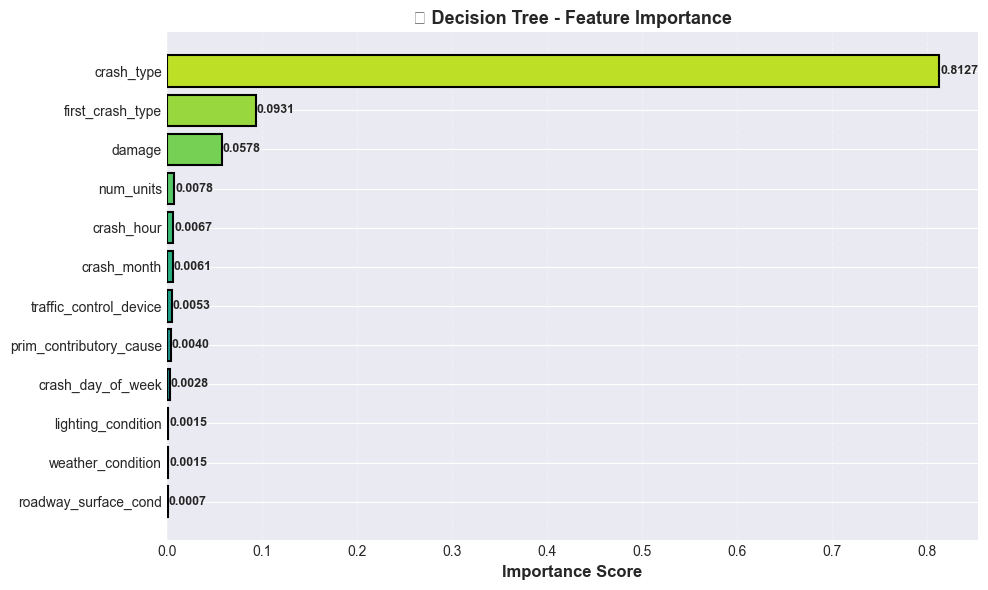

TOP 5 MOST IMPORTANT FEATURES

🌳 Decision Tree:
   crash_type: 0.8127
   first_crash_type: 0.0931
   damage: 0.0578
   num_units: 0.0078
   crash_hour: 0.0067

✅ Feature importance analysis completed!


In [24]:
# Feature importance for Decision Tree
dt_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': models['Decision Tree'].feature_importances_
}).sort_values('importance', ascending=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
colors_dt = plt.cm.viridis(np.linspace(0.3, 0.9, len(dt_importance)))
bars = ax.barh(dt_importance['feature'], dt_importance['importance'], 
                color=colors_dt, edgecolor='black', linewidth=1.5)
ax.set_title('🌳 Decision Tree - Feature Importance', fontweight='bold', fontsize=13)
ax.set_xlabel('Importance Score', fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, dt_importance['importance'])):
    width = bar.get_width()
    ax.text(width + 0.001, bar.get_y() + bar.get_height()/2.,
             f'{val:.4f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Print top features
print("="*70)
print("TOP 5 MOST IMPORTANT FEATURES")
print("="*70)

print("\n🌳 Decision Tree:")
for idx, row in dt_importance.tail(5).iloc[::-1].iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

print("\n✅ Feature importance analysis completed!")

## 11. Model Performance Summary

Summary of both models' performance.

In [25]:
# Print performance summary
print("="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)

for model_name in models.keys():
    y_pred = predictions[model_name]
    
    print(f"\n{'='*70}")
    print(f"📋 {model_name}")
    print(f"{'='*70}")
    print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

print("\n✅ Performance summary completed!")

MODEL PERFORMANCE SUMMARY

📋 Decision Tree
                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00        70
   INCAPACITATING INJURY       0.18      0.01      0.01      1313
 NO INDICATION OF INJURY       0.80      0.99      0.89     30958
NONINCAPACITATING INJURY       0.59      0.30      0.40      6306
   REPORTED, NOT EVIDENT       0.52      0.06      0.11      3215

                accuracy                           0.78     41862
               macro avg       0.42      0.27      0.28     41862
            weighted avg       0.73      0.78      0.72     41862


📋 Logistic Regression
                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00        70
   INCAPACITATING INJURY       0.00      0.00      0.00      1313
 NO INDICATION OF INJURY       0.79      0.98      0.87     30958
NONINCAPACITATING INJURY       0.47      0.27      0.34      6306
   REP

## 12. Save Model Artifacts

Save the trained models and related artifacts for later use.

In [26]:
# Find the best model
best_model_name = metrics_df.iloc[0]['Model']
best_model = models[best_model_name]
best_accuracy = metrics_df.iloc[0]['Accuracy']

print("="*70)
print("SAVING MODEL ARTIFACTS")
print("="*70)

# Save all models
with open('all_models.pkl', 'wb') as f:
    pickle.dump(models, f)
print("✓ All models saved: all_models.pkl")

# Save best model separately
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"✓ Best model ({best_model_name}) saved: best_model.pkl")

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("✓ Label encoders saved: label_encoders.pkl")

# Save feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)
print("✓ Feature columns saved: feature_columns.pkl")

# Save metrics comparison
metrics_df.to_csv('model_metrics.csv', index=False)
print("✓ Model metrics saved: model_metrics.csv")

# Save feature importance
dt_importance.to_csv('feature_importance.csv', index=False)
print("✓ Feature importance saved: feature_importance.csv")

print("\n" + "="*70)
print("✅ ALL ARTIFACTS SAVED SUCCESSFULLY!")
print("="*70)
print(f"\n🏆 Best Model: {best_model_name}")
print(f"📊 Accuracy: {best_accuracy*100:.2f}%")

SAVING MODEL ARTIFACTS
✓ All models saved: all_models.pkl
✓ Best model (Decision Tree) saved: best_model.pkl
✓ Label encoders saved: label_encoders.pkl
✓ Feature columns saved: feature_columns.pkl
✓ Model metrics saved: model_metrics.csv
✓ Feature importance saved: feature_importance.csv

✅ ALL ARTIFACTS SAVED SUCCESSFULLY!

🏆 Best Model: Decision Tree
📊 Accuracy: 78.25%


## 13. Final Summary

Summary of the analysis and results.

In [27]:
print("\n")
print("="*70)
print("🎉 TRAFFIC ACCIDENTS ANALYSIS COMPLETED! 🎉")
print("="*70)
print(f"\n✅ {len(models)} models trained and evaluated")
print(f"✅ {len(feature_columns)} features analyzed")
print(f"✅ {len(df):,} accident records processed")
print(f"✅ Multiple visualizations generated")
print(f"\n🏆 Best performing model: {best_model_name} ({best_accuracy*100:.2f}% accuracy)")
print("\n" + "="*70)
print("📁 Generated Files:")
print("="*70)
print("\nModels:")
print("  • all_models.pkl")
print("  • best_model.pkl")
print("  • label_encoders.pkl")
print("  • feature_columns.pkl")
print("\nMetrics:")
print("  • model_metrics.csv")
print("  • feature_importance.csv")
print("\nVisualizations:")
print("  • comprehensive_analysis.png")
print("  • model_comparison.png")
print("  • confusion_matrices.png")
print("  • feature_importance.png")
print("\n" + "="*70)
print("🚀 Next Steps:")
print("="*70)
print("  1. Review all visualizations")
print("  2. Check model performance metrics")
print("  3. Run the Streamlit app: streamlit run app.py")
print("\n✅ Analysis completed successfully!")
print("="*70)



🎉 TRAFFIC ACCIDENTS ANALYSIS COMPLETED! 🎉

✅ 2 models trained and evaluated
✅ 12 features analyzed
✅ 209,306 accident records processed
✅ Multiple visualizations generated

🏆 Best performing model: Decision Tree (78.25% accuracy)

📁 Generated Files:

Models:
  • all_models.pkl
  • best_model.pkl
  • label_encoders.pkl
  • feature_columns.pkl

Metrics:
  • model_metrics.csv
  • feature_importance.csv

Visualizations:
  • comprehensive_analysis.png
  • model_comparison.png
  • confusion_matrices.png
  • feature_importance.png

🚀 Next Steps:
  1. Review all visualizations
  2. Check model performance metrics
  3. Run the Streamlit app: streamlit run app.py

✅ Analysis completed successfully!
